# Q1: Create Sensor Data Variables

## Task Description
Create three variables:
- `Sensor_IDs`: five unique alphanumeric strings using hashing.
- `Temperature_Readings`: random temperatures between -10°C and 50°C.
- `Humidity_Levels`: random humidity levels between 10% and 100%.

Print and validate the values.

In [8]:
import random
import hashlib

# Function to generate a unique sensor ID using hashing
def generate_sensor_id(index):
    base_string = f"sensor_{index}_{random.random()}"
    return hashlib.sha256(base_string.encode()).hexdigest()[:10]  # First 10 chars

# Generate 5 unique Sensor IDs
Sensor_IDs = [generate_sensor_id(i) for i in range(5)]

# Generate random temperature values between -10 and 50
Temperature_Readings = [round(random.uniform(-10, 50), 2) for _ in range(5)]

# Generate random humidity levels between 10 and 100
Humidity_Levels = [round(random.uniform(10, 100), 2) for _ in range(5)]

# Print all values
print("Sensor IDs:", Sensor_IDs)
print("Temperature Readings:", Temperature_Readings)
print("Humidity Levels:", Humidity_Levels)


Sensor IDs: ['114bf79d95', 'c3da0afa98', '09d1ca2dda', '0f4361b33f', '16516291ab']
Temperature Readings: [39.53, 32.7, 34.73, 49.34, -5.41]
Humidity Levels: [43.38, 57.12, 17.95, 34.1, 88.4]


# Q2: Create Sensor Data Dictionary and Filter Top Temperatures

## 📝 Task Description

- Create a dictionary where:
  - Keys = Sensor IDs
  - Values = Dictionary containing Temperature and Humidity
- Write a function that:
  - Filters sensors with temperatures above a threshold
  - Sorts sensors by temperature in descending order
  - Displays the top 3 highest temperatures
  - Handles missing or invalid data

In [12]:
# Combine into a dictionary: Sensor_ID -> {Temperature, Humidity}
sensor_data = {
    sid: {
        "Temperature_Reading": temp,
        "Humidity_Level": humidity
    }
    for sid, temp, humidity in zip(Sensor_IDs, Temperature_Readings, Humidity_Levels)
}
# Display all sensor data
print("All Sensor Data:")
for sid, data in sensor_data.items():
    print(f"{sid} => Temp: {data['Temperature_Reading']}°C | Humidity: {data['Humidity_Level']}%")


# --- Function to Filter and Display Top 3 Sensors ---

def filter_top_sensors(data, temp_threshold):
    # Step 1: Remove invalid or missing readings
    valid_sensors = {
        sid: info for sid, info in data.items()
        if isinstance(info['Temperature_Reading'], (int, float)) and info['Temperature_Reading'] is not None
    }

    # Step 2: Filter based on temperature threshold
    filtered = {
        sid: info for sid, info in valid_sensors.items()
        if info['Temperature_Reading'] > temp_threshold
    }

    # Step 3: Sort by temperature in descending order
    sorted_sensors = dict(
        sorted(filtered.items(), key=lambda x: x[1]['Temperature_Reading'], reverse=True)
    )

    # Step 4: Print top 3 highest temperatures
    print("\nTop 3 Sensors with Temperature Above Threshold:")
    for sid, info in list(sorted_sensors.items())[:3]:
        print(f"Sensor {sid} | Temp: {info['Temperature_Reading']}°C | Humidity: {info['Humidity_Level']}%")

# Example usage
filter_top_sensors(sensor_data, temp_threshold=30)

All Sensor Data:
114bf79d95 => Temp: 39.53°C | Humidity: 43.38%
c3da0afa98 => Temp: 32.7°C | Humidity: 57.12%
09d1ca2dda => Temp: 34.73°C | Humidity: 17.95%
0f4361b33f => Temp: 49.34°C | Humidity: 34.1%
16516291ab => Temp: -5.41°C | Humidity: 88.4%

Top 3 Sensors with Temperature Above Threshold:
Sensor 0f4361b33f | Temp: 49.34°C | Humidity: 34.1%
Sensor 114bf79d95 | Temp: 39.53°C | Humidity: 43.38%
Sensor 09d1ca2dda | Temp: 34.73°C | Humidity: 17.95%


# Q3: Air Quality Analysis and Recommendation

## 📝 Task Summary

- Create a variable `air_quality` that can take one of:  
  `'Good'`, `'Moderate'`, `'Unhealthy'`, `'Hazardous'`
- Write a function that:
  - Recommends an activity based on the air quality value
  - Handles unexpected inputs and prompts for correction
- Simulate 10 random air quality readings:
  - Count how many times each category appears
  - Calculate the percentage of each
  - Display the results in a structured format (dictionary/table)

---

In [16]:
import random

# List of valid air quality categories
valid_categories = ['Good', 'Moderate', 'Unhealthy', 'Hazardous']

# Activity recommendation function
def recommend_activity(air_quality):
    air_quality = air_quality.capitalize()  # Makes 'good', 'GOOD' into 'Good'
    
    if air_quality == 'Good':
        return "Great day! You can go for a walk or exercise outside."
    elif air_quality == 'Moderate':
        return "It's okay to go outside, but don’t overdo physical activities."
    elif air_quality == 'Unhealthy':
        return "Better to stay indoors, especially if you have health issues."
    elif air_quality == 'Hazardous':
        return "Avoid going outside. Stay safe and use an air purifier if possible."
    else:
        return "Invalid air quality. Please enter: Good, Moderate, Unhealthy, or Hazardous."

# ✅ Simulate 10 random air quality readings
random_readings = [random.choice(valid_categories) for _ in range(10)]

# Count occurrences
air_quality_count = {category: 0 for category in valid_categories}

for reading in random_readings:
    air_quality_count[reading] += 1

# Calculate percentages
air_quality_percent = {
    category: round((count / 10) * 100, 1)
    for category, count in air_quality_count.items()
}


print("Random Air Quality Readings (10 samples):")
print(random_readings)

print("\nAir Quality Occurrences:")
for category, count in air_quality_count.items():
    print(f"{category}: {count} times ({air_quality_percent[category]}%)")


Random Air Quality Readings (10 samples):
['Hazardous', 'Good', 'Good', 'Good', 'Good', 'Good', 'Moderate', 'Hazardous', 'Good', 'Moderate']

Air Quality Occurrences:
Good: 6 times (60.0%)
Moderate: 2 times (20.0%)
Unhealthy: 0 times (0.0%)
Hazardous: 2 times (20.0%)


# Q4: While Loop – Even and Odd Number Classifier

## 📝 Task Summary

- Continuously ask the user to input a number.
- Stop when a **negative number** is entered.
- Classify numbers into **even** or **odd**.
- Avoid duplicates in both lists.
- Handle invalid (non-numeric) input gracefully.
- Save results to a file named `loop_log.txt`.


In [17]:
even_numbers = []
odd_numbers = []

print("Enter numbers one by one. Enter a negative number to stop.\n")

while True:
    user_input = input("Enter a number: ")

    # Check for valid integer input
    if not user_input.lstrip("-").isdigit():
        print("❌ Please enter a valid number.")
        continue

    number = int(user_input)

    # Break loop on negative input
    if number < 0:
        print("Stopping input... saving results.\n")
        break

    # Add to even or odd list (no duplicates)
    if number % 2 == 0:
        if number not in even_numbers:
            even_numbers.append(number)
    else:
        if number not in odd_numbers:
            odd_numbers.append(number)

# Write both lists to a text file
with open("loop_log.txt", "w") as file:
    file.write("Even Numbers:\n")
    file.write(", ".join(map(str, even_numbers)) + "\n\n")
    file.write("Odd Numbers:\n")
    file.write(", ".join(map(str, odd_numbers)) + "\n")

print("✅ Numbers saved to loop_log.txt successfully.")


Enter numbers one by one. Enter a negative number to stop.



Enter a number:  3
Enter a number:  2
Enter a number:  4
Enter a number:  2
Enter a number:  4
Enter a number:  5
Enter a number:  6
Enter a number:  7
Enter a number:  8
Enter a number:  2
Enter a number:  34
Enter a number:  54
Enter a number:  -1


Stopping input... saving results.

✅ Numbers saved to loop_log.txt successfully.


# Q5: Scientific Term – Even and Odd Characters

## 📝 Task Summary

- Ask the user to enter a **scientific term**.
- Print all characters at:
  - **Even positions** (index 0, 2, 4, ...)
  - **Odd positions** (index 1, 3, 5, ...)
- Do **not** use Python slicing (`[::]`).

---

In [18]:
# Ask user for a scientific term
term = input("Enter a scientific term: ")

even_chars = ""
odd_chars = ""

# Go through each character by position
for index in range(len(term)):
    if index % 2 == 0:
        even_chars += term[index]
    else:
        odd_chars += term[index]

print("Characters at even positions:", even_chars)
print("Characters at odd positions:", odd_chars)


Enter a scientific term:  Homosapiens


Characters at even positions: Hmspes
Characters at odd positions: ooain


# Q6: WeatherData.csv – Mean Wind Speed Adjustment

## 📝 Task Summary

- Load the dataset `WeatherData.csv` using pandas.
- Display:
  - Total number of rows (weather stations)
  - Total number of columns (parameters recorded)
- Calculate the mean wind speed.
- Subtract this mean from each wind speed value.
- Display both the original and adjusted wind speed values.

---

In [25]:
import pandas as pd

# Step 1: Load the dataset
df = pd.read_csv("WeatherData.csv")

# Step 2: Show shape of the dataset
print(f"Number of rows (weather stations): {df.shape[0]}")
print(f"Number of columns (parameters): {df.shape[1]}")

# Step 3: Show original wind speed values
print("\nOriginal Wind Speed values:")
print(df["Wind_Speed_kmh"].head())  # Show first 5 values

# Step 4: Calculate mean wind speed
mean_wind = df["Wind_Speed_kmh"].mean()
print(f"\nMean Wind Speed: {mean_wind:.2f}")

# Step 5: Subtract mean from all wind speed values
df["WindSpeed_Adjusted"] = df["Wind_Speed_kmh"] - mean_wind

# Step 6: Show modified values
print("\nAdjusted Wind Speed values:")
print(df[["Wind_Speed_kmh", "WindSpeed_Adjusted"]].head())


Number of rows (weather stations): 1000
Number of columns (parameters): 7

Original Wind Speed values:
0    43.79
1    17.41
2     2.12
3    12.39
4    27.33
Name: Wind_Speed_kmh, dtype: float64

Mean Wind Speed: 23.55

Adjusted Wind Speed values:
   Wind_Speed_kmh  WindSpeed_Adjusted
0           43.79            20.24154
1           17.41            -6.13846
2            2.12           -21.42846
3           12.39           -11.15846
4           27.33             3.78154


# Q7: Handling Missing Values – Imputation Techniques

## 📝 Task Summary

- Load `WeatherData.csv` using pandas.
- Identify missing values in the dataset.
- Choose **two different imputation methods** to handle them:
  - **Mean imputation** for `Temperature`
  - **Forward fill** for `Humidity`
- Compare the distribution **before and after** imputation.
- Save the cleaned dataset as `WeatherData_Cleaned.csv`.

---


Missing values in each column:
Station_ID              0
Temperature_C          50
Humidity_%             50
Wind_Speed_kmh          0
Precipitation_mm        0
Weather_Condition       0
Unnamed: 6           1000
dtype: int64


/var/folders/td/k6fvhfwd3pzft8bk6bhyz16m0000gn/T/ipykernel_8402/1808844565.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Humidity_%"] = df["Humidity_%"].fillna(method="ffill")


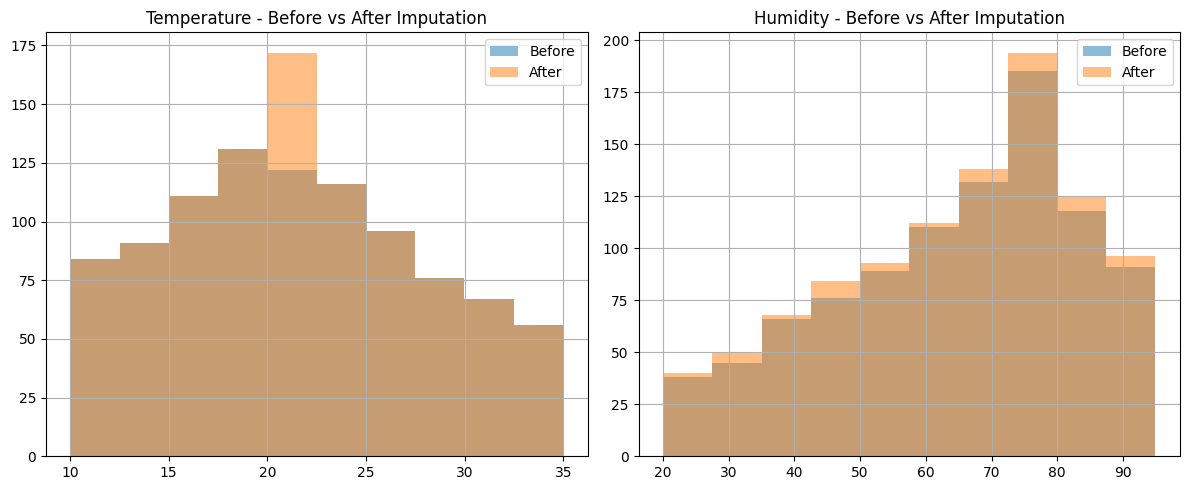


✅ Missing values handled and cleaned data saved to 'WeatherData_Cleaned.csv'.


In [51]:
import matplotlib.pyplot as plt

# Step 1: Loading dataset
df = pd.read_csv("WeatherData.csv")

# Step 2: Showing missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Step 3: Imputation Method 1 - Fill 'Temperature' with mean
df["Temperature_before"] = df["Temperature_C"]  # Keep original for comparison
df["Temperature_C"] = df["Temperature_C"].fillna(df["Temperature_C"].mean())

# Step 4: Imputation Method 2 - Forward fill 'Humidity'
df["Humidity_before"] = df["Humidity_%"]  # Keep original
df["Humidity_%"] = df["Humidity_%"].fillna(method="ffill")

plt.figure(figsize=(12, 5))
# Temperature before and after
plt.subplot(1, 2, 1)
df["Temperature_before"].hist(alpha=0.5, label='Before')
df["Temperature_C"].hist(alpha=0.5, label='After')
plt.title("Temperature - Before vs After Imputation")
plt.legend()

# Humidity before and after
plt.subplot(1, 2, 2)
df["Humidity_before"].hist(alpha=0.5, label='Before')
df["Humidity_%"].hist(alpha=0.5, label='After')
plt.title("Humidity - Before vs After Imputation")
plt.legend()

plt.tight_layout()
plt.show()


# Step 6: Save cleaned dataset
df.drop(columns=["Temperature_before", "Humidity_before"], inplace=True)
df.to_csv("WeatherData_Cleaned.csv", index=False)

print("\n✅ Missing values handled and cleaned data saved to 'WeatherData_Cleaned.csv'.")

### 📊 Visual Comparison Summary

- **Temperature Histogram:** You’ll notice a small spike near the mean value after imputation — this is expected with mean replacement.
- **Humidity Histogram:** Forward fill keeps the general shape of the original distribution, but may slightly smoothen sudden dips caused by missing values.

---

### ✅ Conclusion

Both methods are useful, but they should be chosen based on the nature of the data:

| Feature     | Technique Used | Reason                        |
|-------------|----------------|-------------------------------|
| Temperature | Mean Imputation | Normally distributed data     |
| Humidity    | Forward Fill    | Time-like gradual changes     |

# Q8: Encoding the `Weather_Condition` Column

## 📝 Task Summary

- Encode the categorical `Weather_Condition` column from `WeatherData.csv`.
- Use both **Label Encoding** and **One-Hot Encoding**.
- Save both encoded versions of the dataset.
- Justify the choice of encoding techniques.


In [58]:

# Load the cleaned weather dataset
df = pd.read_csv("WeatherData_Cleaned.csv")

# Show unique values in the Weather_Condition column
print("Unique weather conditions:")
print(df["Weather_Condition"].unique())

# Label Encoding
df["Weather_Condition_Label"] = df["Weather_Condition"].astype("category").cat.codes

print("\nLabel Encoded Values:")
print(df[["Weather_Condition", "Weather_Condition_Label"]].head())

# One-Hot Encoding
one_hot_encoded = pd.get_dummies(df["Weather_Condition"], prefix="Weather")

# Combine with original data
df_with_onehot = pd.concat([df, one_hot_encoded], axis=1)

# Display first few rows of new dataframe
print("\nOne-Hot Encoded Columns:")
print(df_with_onehot.head())

# Save both versions (optional)
df.to_csv("WeatherData_LabelEncoded.csv", index=False)
df_with_onehot.to_csv("WeatherData_OneHotEncoded.csv", index=False)

print("\n✅ Encoding complete. Files saved.")




Unique weather conditions:
['Stormy' 'Cloudy' 'Sunny' 'Rainy']

Label Encoded Values:
  Weather_Condition  Weather_Condition_Label
0            Stormy                        2
1            Cloudy                        0
2             Sunny                        3
3             Rainy                        1
4            Stormy                        2

One-Hot Encoded Columns:
  Station_ID  Temperature_C  Humidity_%  Wind_Speed_kmh  Precipitation_mm  \
0      STN_1          21.60       80.01           43.79             25.21   
1      STN_2          17.20       70.50           17.41              8.76   
2      STN_3          26.96       53.35            2.12              1.11   
3      STN_4          22.14       86.37           12.39             10.25   
4      STN_5          12.52       86.81           27.33             23.13   

  Weather_Condition  Unnamed: 6  Weather_Condition_Label  Weather_Cloudy  \
0            Stormy         NaN                        2           False   
1  

## 🔍 Summary: Encoding the Weather_Condition Column

In this task, we encoded the categorical column `Weather_Condition` using two different techniques:

---

### ✅ 1. Label Encoding

- Converts categories into numeric labels (e.g., Sunny → 0, Rainy → 1).
- **Simple and memory-efficient**.
- Best used when:
  - The categories have an **inherent order** (like Low, Medium, High) — though not in this case.
- ⚠️ Not suitable for ML models that treat numbers as ranked or weighted unless the data is truly ordinal.

---

### ✅ 2. One-Hot Encoding

- Converts each category into a **separate column** with 0s and 1s.
- Best used when:
  - Categories are **nominal** (no natural order), like weather types.
  - You want to avoid giving false numerical meaning to the labels.
- **Preferred for ML models like linear regression, logistic regression, or tree-based models**.

---

### ✅ Justification

For `Weather_Condition`, one-hot encoding is more appropriate because:
- The categories (e.g., Sunny, Rainy, Cloudy) are **nominal**, not ordered.
- It avoids misinterpretation by the model that one weather condition is "greater" than another.

However, label encoding was also performed for comparison or if needed by simpler models or algorithms that can handle categorical codes efficiently.

---


# Q9: Apply Min-Max Scaling and Analyze the Effect

## 📝 Task Summary

- Load the cleaned dataset `WeatherData_Cleaned.csv`.
- Apply **Min-Max Scaling** to all numerical columns, excluding `Station_ID`.
- Generate two visualizations:
  - A side-by-side **histogram** of temperature before and after scaling.
  - A **boxplot** of wind speed before and after scaling.
- Analyze the effect of Min-Max Scaling on the data distribution.


/Users/hashaamkhan/my_env/lib/python3.13/site-packages/sklearn/utils/_array_api.py:776: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
/Users/hashaamkhan/my_env/lib/python3.13/site-packages/sklearn/utils/_array_api.py:793: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


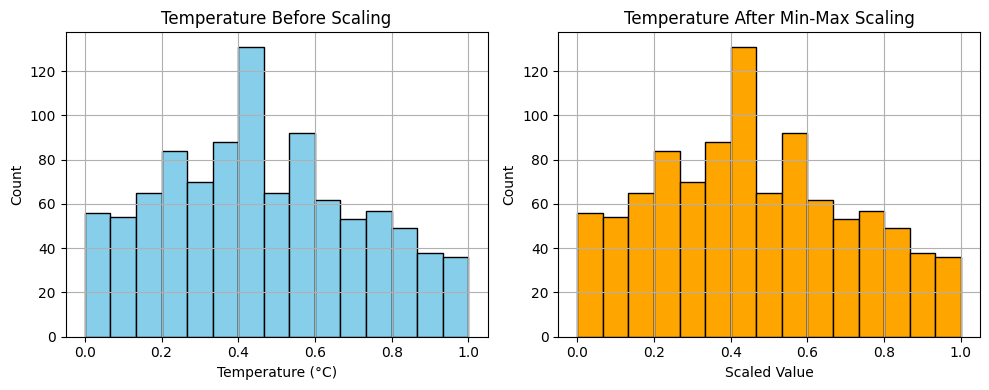

/var/folders/td/k6fvhfwd3pzft8bk6bhyz16m0000gn/T/ipykernel_8402/3517775341.py:40: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df["WindSpeed_Original"], df["Wind_Speed_kmh"]], labels=["Before", "After"])


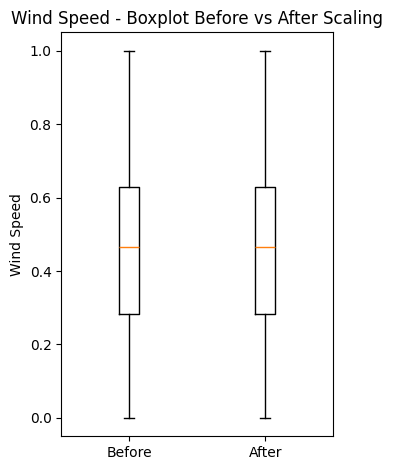

In [67]:

from sklearn.preprocessing import MinMaxScaler

# Step 1: Load the dataset
df = pd.read_csv("WeatherData_Cleaned.csv")

# Step 2: Backup original temperature and wind speed
df["Temperature_Original"] = df["Temperature_C"]
df["WindSpeed_Original"] = df["Wind_Speed_kmh"]

# Step 3: Select numeric columns to scale (excluding Station_ID)
cols_to_scale = df.select_dtypes(include='number').columns
cols_to_scale = [col for col in cols_to_scale if col != 'Station_ID']

# Step 4: Apply Min-Max Scaling
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

# Histogram - Temperature before and after scaling (side by side)
plt.figure(figsize=(10, 4))

# Before scaling
plt.subplot(1, 2, 1)
df["Temperature_Original"].hist(bins=15, color="skyblue", edgecolor="black")
plt.title("Temperature Before Scaling")
plt.xlabel("Temperature (°C)")
plt.ylabel("Count")

# After scaling
plt.subplot(1, 2, 2)
df["Temperature_C"].hist(bins=15, color="orange", edgecolor="black")
plt.title("Temperature After Min-Max Scaling")
plt.xlabel("Scaled Value")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

# Step 6: Plot Boxplot of Wind Speed before and after scaling
plt.subplot(1, 2, 2)
plt.boxplot([df["WindSpeed_Original"], df["Wind_Speed_kmh"]], labels=["Before", "After"])
plt.title("Wind Speed - Boxplot Before vs After Scaling")
plt.ylabel("Wind Speed")

plt.tight_layout()
plt.show()


## 🔍 Analysis: Effect of Min-Max Scaling on Distribution

Min-Max Scaling transformed all numerical values (excluding Station_ID) to a range between 0 and 1 without changing the shape of the distributions. The histogram of temperature before and after scaling shows that the overall distribution remains consistent—only the scale is adjusted. Similarly, the wind speed boxplot demonstrates that while the absolute values were compressed, the relative spacing and presence of outliers were preserved. This scaling is particularly useful for machine learning models that are sensitive to the magnitude of features, such as distance-based or gradient-based algorithms.
